In [1]:
# import package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load original data
df = pd.read_csv('Bernis_climate_1979_2025.csv', parse_dates=['time'])
df.set_index('time', inplace=True)

start_date = '2010-01-01'
end_date = '2025-12-31'
cutoff_date = '2025-06-13'
fill_start_date = '2025-06-14'

for fill_year in range(2015, 2025):  # Vary fill year from 2015 to 2024
    # Extract data from 2010-01-01 to cutoff_date (2025-06-13)
    df_part1 = df.loc[start_date:cutoff_date]

    # Create a date range for missing dates (2025-06-14 to 2025-12-31)
    missing_dates = pd.date_range(fill_start_date, end_date)

    # For these missing dates, get the corresponding dates in the fill_year
    dates_fill_year = missing_dates.map(lambda x: x.replace(year=fill_year))

    # Extract t2m for these fill_year dates
    df_fill = df.loc[dates_fill_year]

    # Make sure index matches the missing_dates so we can append
    df_fill.index = missing_dates

    # Concatenate the two parts
    df_final = pd.concat([df_part1, df_fill])

    # Reset index and rename for saving
    df_final.reset_index(inplace=True)
    df_final.rename(columns={'index': 'time'}, inplace=True)

    # Save CSV with fill year info
    filename = f'output/bernis_filled_{fill_year}.csv'
    df_final.to_csv(filename, index=False)

    print(f'Saved {filename}')


Saved output/bernis_filled_2015.csv
Saved output/bernis_filled_2016.csv
Saved output/bernis_filled_2017.csv
Saved output/bernis_filled_2018.csv
Saved output/bernis_filled_2019.csv
Saved output/bernis_filled_2020.csv
Saved output/bernis_filled_2021.csv
Saved output/bernis_filled_2022.csv
Saved output/bernis_filled_2023.csv
Saved output/bernis_filled_2024.csv


In [6]:
df_filled = pd.read_csv('output/bernis_filled_2024.csv', parse_dates=['time'])
mask_filled = (df_filled['time'] >= '2025-06-14') & (df_filled['time'] <= '2025-12-31')
df_filled_sub = df_filled.loc[mask_filled]

df_new = pd.read_csv('Bernis_climate_1979_2025.csv', parse_dates=['time'])
mask = (df_new['time'] >= '2024-06-14') & (df_new['time'] <= '2024-12-31')
df_sub = df_new.loc[mask]

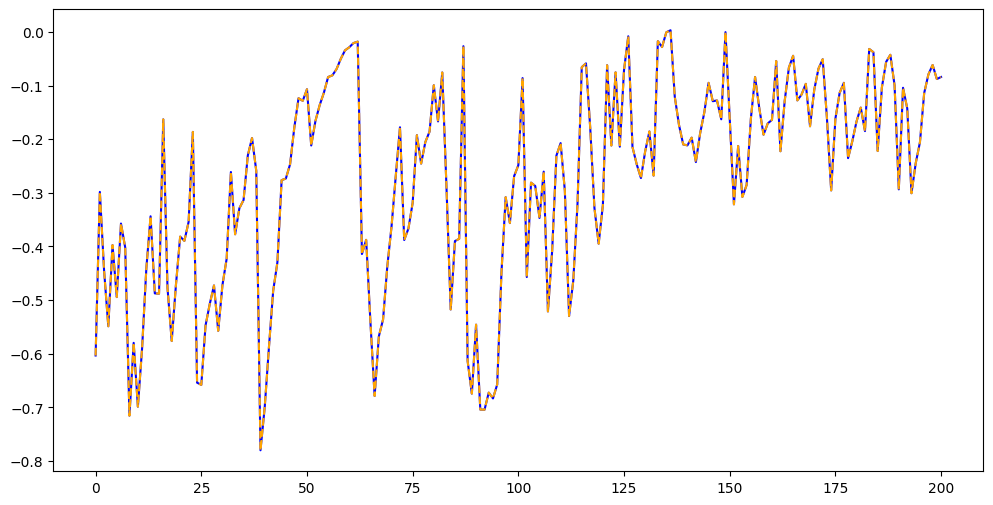

In [7]:
plt.figure(figsize=(12,6))

# Plot filled data for 2025 (df_final) after 2025-06-14
plt.plot(df_filled_sub['evaow'].values, color='blue')

# Plot original data used for filling
plt.plot(df_sub['evaow'].values, color='orange', linestyle='--')

plt.show()

In [8]:
df2015 = pd.read_csv('output/bernis_filled_2015.csv', parse_dates=['time'])
mask2015 = (df2015['time'] >= '2025-06-14') & (df2015['time'] <= '2025-12-31')
df2015_sub = df2015.loc[mask2015]

df2016 = pd.read_csv('output/bernis_filled_2016.csv', parse_dates=['time'])
mask2016 = (df2016['time'] >= '2025-06-14') & (df2016['time'] <= '2025-12-31')
df2016_sub = df2016.loc[mask2016]

df2017 = pd.read_csv('output/bernis_filled_2017.csv', parse_dates=['time'])
mask2017 = (df2017['time'] >= '2025-06-14') & (df2017['time'] <= '2025-12-31')
df2017_sub = df2017.loc[mask2017]

df2018 = pd.read_csv('output/bernis_filled_2018.csv', parse_dates=['time'])
mask2018 = (df2018['time'] >= '2025-06-14') & (df2018['time'] <= '2025-12-31')
df2018_sub = df2018.loc[mask2018]

df2019 = pd.read_csv('output/bernis_filled_2019.csv', parse_dates=['time'])
mask2019 = (df2019['time'] >= '2025-06-14') & (df2019['time'] <= '2025-12-31')
df2019_sub = df2019.loc[mask2019]

df2020 = pd.read_csv('output/bernis_filled_2020.csv', parse_dates=['time'])
mask2020 = (df2020['time'] >= '2025-06-14') & (df2020['time'] <= '2025-12-31')
df2020_sub = df2020.loc[mask2020]

df2021 = pd.read_csv('output/bernis_filled_2021.csv', parse_dates=['time'])
mask2021 = (df2021['time'] >= '2025-06-14') & (df2021['time'] <= '2025-12-31')
df2021_sub = df2021.loc[mask2021]

df2022 = pd.read_csv('output/bernis_filled_2022.csv', parse_dates=['time'])
mask2022 = (df2022['time'] >= '2025-06-14') & (df2022['time'] <= '2025-12-31')
df2022_sub = df2022.loc[mask2022]

df2023 = pd.read_csv('output/bernis_filled_2023.csv', parse_dates=['time'])
mask2023 = (df2023['time'] >= '2025-06-14') & (df2023['time'] <= '2025-12-31')
df2023_sub = df2023.loc[mask2023]

df2024 = pd.read_csv('output/bernis_filled_2024.csv', parse_dates=['time'])
mask2024 = (df2024['time'] >= '2025-06-14') & (df2024['time'] <= '2025-12-31')
df2024_sub = df2024.loc[mask2024]

df_obs = pd.read_csv('Bernis_climate_1979_2025.csv', parse_dates=['time'])
mask_obs = (df_obs['time'] >= '2025-01-01') & (df_obs['time'] <= '2025-06-13')
df_obs = df_obs.loc[mask_obs]

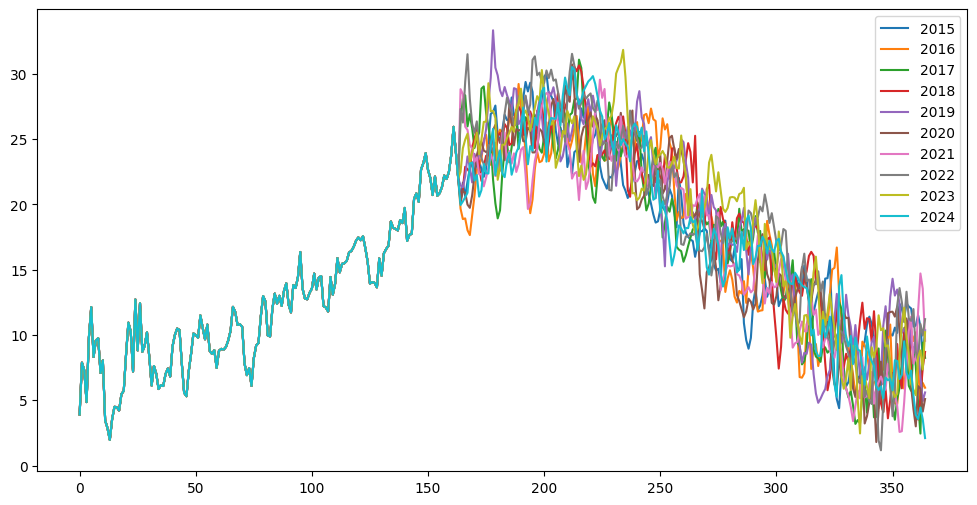

In [10]:
plt.figure(figsize=(12,6))

# Plot filled data for 2025 (df_final) after 2025-06-14
plt.plot(np.concatenate([df_obs['t2m'].values, df2015_sub['t2m'].values]), label='2015')
plt.plot(np.concatenate([df_obs['t2m'].values, df2016_sub['t2m'].values]), label='2016')
plt.plot(np.concatenate([df_obs['t2m'].values, df2017_sub['t2m'].values]), label='2017')
plt.plot(np.concatenate([df_obs['t2m'].values, df2018_sub['t2m'].values]), label='2018')
plt.plot(np.concatenate([df_obs['t2m'].values, df2019_sub['t2m'].values]), label='2019')
plt.plot(np.concatenate([df_obs['t2m'].values, df2020_sub['t2m'].values]), label='2020')
plt.plot(np.concatenate([df_obs['t2m'].values, df2021_sub['t2m'].values]), label='2021')
plt.plot(np.concatenate([df_obs['t2m'].values, df2022_sub['t2m'].values]), label='2022')
plt.plot(np.concatenate([df_obs['t2m'].values, df2023_sub['t2m'].values]), label='2023')
plt.plot(np.concatenate([df_obs['t2m'].values, df2024_sub['t2m'].values]), label='2024')
plt.legend()
plt.savefig('temp_data.pdf')
plt.show()

In [11]:
df_15 = pd.read_csv('output/bernis_filled_2015.csv', parse_dates=['time'])
df_19 = pd.read_csv('output/bernis_filled_2019.csv', parse_dates=['time'])
df_24 = pd.read_csv('output/bernis_filled_2024.csv', parse_dates=['time'])
df_24

,time,longitude,latitude,t2m,tp,evaow
0,2010-01-01,4.29,43.77,8.209386,0.257980,-0.029929
1,2010-01-02,4.29,43.77,3.029517,6.376159,-0.086865
2,2010-01-03,4.29,43.77,1.743302,0.002619,-0.201734
3,2010-01-04,4.29,43.77,3.372166,3.303974,-0.114968
4,2010-01-05,4.29,43.77,4.173687,2.190863,-0.009400
...,...,...,...,...,...,...
5839,2025-12-27,4.29,43.77,3.885315,0.001289,-0.114404
5840,2025-12-28,4.29,43.77,3.557556,0.000852,-0.079379
5841,2025-12-29,4.29,43.77,4.442139,0.000000,-0.061748
5842,2025-12-30,4.29,43.77,3.542175,0.000858,-0.087944


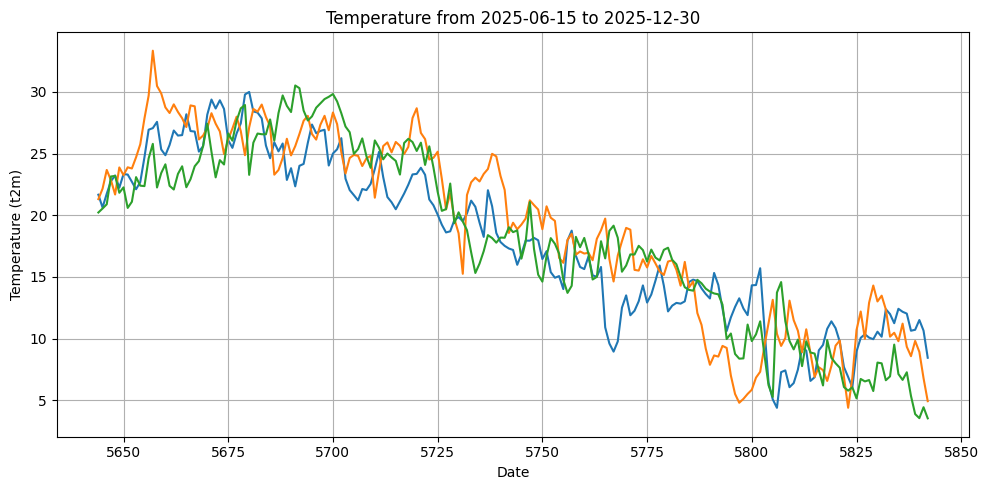

In [13]:
 # Filter the DataFrame for the date range
start_date = pd.to_datetime("2025-06-15")
end_date = pd.to_datetime("2025-12-30")
filtered_df24 = df_24[(df_24.time >= start_date) & (df_24.time <= end_date)]
filtered_df19 = df_19[(df_19.time >= start_date) & (df_19.time <= end_date)]
filtered_df15 = df_15[(df_15.time >= start_date) & (df_15.time <= end_date)]

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(filtered_df15.index, filtered_df15["t2m"])
plt.plot(filtered_df19.index, filtered_df19["t2m"])
plt.plot(filtered_df24.index, filtered_df24["t2m"])
plt.xlabel("Date")
plt.ylabel("Temperature (t2m)")
plt.title("Temperature from 2025-06-15 to 2025-12-30")
plt.grid(True)
plt.tight_layout()
plt.show()